In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('car.csv')
df

,buying,maint,doors,persons,lug_boot,safety,Unnamed: 6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [57]:
df.rename(columns={'Unnamed: 6':'status'},inplace = True)
df

,buying,maint,doors,persons,lug_boot,safety,status
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [58]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,status
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [59]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'status'], dtype='object')

In [60]:
for i in df:
    print(df[i].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


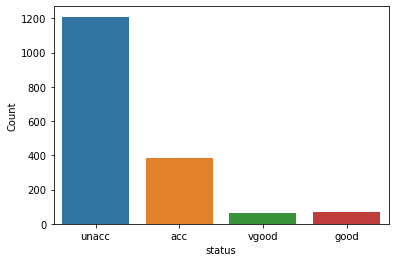

unacc    1210
acc       384
good       69
vgood      65
Name: status, dtype: int64

In [61]:
sns.countplot('status',data=df)
plt.ylabel('Count')
plt.show()
df['status'].value_counts()

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df:
    df[i] = encoder.fit_transform(df[i])
    

In [63]:
#Finding The features
X = df.drop('status',axis=1)
y = df['status']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.32, random_state = 42)

# SVM

In [65]:
from sklearn.svm import SVC
model2 = SVC(kernel='linear', C=1.0)
model2.fit(X_train, y_train)

SVC(kernel='linear')

In [66]:
svm_pred  =  model2.predict(X_test)

In [67]:
print('Training set score: {:.4f}'.format(model2.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model2.score(X_test, y_test)))

Training set score: 0.7285
Test set score: 0.7143


In [68]:
print(f"SVM accuracy is : {round(accuracy_score(y_test,svm_pred)*100,2)} %")

SVM accuracy is : 71.43 %


In [69]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.52      0.12      0.19       125
           1       0.00      0.00      0.00        19
           2       0.73      0.99      0.84       384
           3       0.00      0.00      0.00        25

    accuracy                           0.71       553
   macro avg       0.31      0.28      0.26       553
weighted avg       0.62      0.71      0.63       553



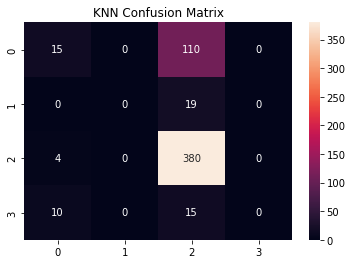

In [70]:
plt.title('SVM Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt='g')
plt.show()